In [375]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

pd.set_option('display.max_columns', None)

## DATA ##

In [376]:
df = pd.read_csv("/Users/admin/Documents/Documents/Le_Wagon/Week_8_Project/Kick_off/FC26_20250921.csv")
df.head()

/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_7286/248030827.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/admin/Documents/Documents/Le_Wagon/Week_8_Project/Kick_off/FC26_20250921.csv")


,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,252371,/player/252371/jude-bellingham/260004/,26,4,2025-09-19,J. Bellingham,Jude Victor William Bellingham,"CAM, CM",90,94,174500000,320000,22,2003-06-29,186,75,53.0,La Liga,1.0,243.0,Real Madrid,CAM,5.0,NaN,2023-07-01,2029.0,14,England,1318.0,CAM,10.0,Right,4,4,5,NaN,Normal (170-185),Yes,370800000.0,"#Dribbler, #Playmaker , #Clinical finisher, #C...","Relentless +, Low Driven Shot, Gamechanger, In...",80.0,86.0,83.0,90.0,78.0,85.0,66,88,75,90,77,91,73,68,89,91,81,80,83,91,83,86,85,94,80,87,85,82,91,90,74,90,77,79,77,14,11,10,5,8,NaN,86+3,86+3,86+3,87+0,89+0,89+0,89+0,87+0,89+3,89+3,89+3,87+3,89+3,89+3,89+3,87+3,83+3,85+3,85+3,85+3,83+3,82+3,81+3,81+3,81+3,82+3,18+3,https://cdn.sofifa.net/players/252/371/26_120.png
1,239053,/player/239053/federico-valverde/260004/,26,4,2025-09-19,F. Valverde,Federico Santiago Valverde Dipetta,"CM, CDM, RB",89,90,120500000,340000,26,1998-07-22,182,74,53.0,La Liga,1.0,243.0,Real Madrid,RDM,8.0,NaN,2016-07-22,2029.0,60,Uruguay,NaN,NaN,NaN,Right,4,3,4,NaN,Unique,Yes,256100000.0,"#Playmaker , #Distance shooter, #Tackling , #T...","Relentless +, Power Shot, Long Ball Pass, Inte...",88.0,84.0,84.0,84.0,83.0,85.0,78,80,63,88,78,84,76,69,88,88,84,92,77,89,68,91,82,93,82,91,81,86,86,86,59,84,82,87,86,6,10,6,15,8,NaN,84+3,84+3,84+3,85+0,86+0,86+0,86+0,85+0,86+3,86+3,86+3,86+3,88+2,88+2,88+2,86+3,86+3,87+3,87+3,87+3,86+3,86+3,83+3,83+3,83+3,86+3,18+3,https://cdn.sofifa.net/players/239/053/26_120.png
2,212622,/player/212622/joshua-kimmich/260004/,26,4,2025-09-19,J. Kimmich,Joshua Walter Kimmich,"CDM, RB, CM",89,89,86000000,140000,30,1995-02-08,177,75,19.0,Bundesliga,1.0,21.0,FC Bayern München,RDM,6.0,NaN,2015-07-01,2029.0,21,Germany,1337.0,RCM,6.0,Right,4,3,4,NaN,Normal (170-185),Yes,141900000.0,"#Playmaker , #Crosser, #Tackling , #Complete m...","Long Ball Pass +, Finesse Shot, Whipped Pass, ...",72.0,74.0,89.0,84.0,83.0,79.0,92,68,72,89,69,82,85,79,92,86,75,70,83,89,84,78,77,92,69,83,89,85,78,86,71,86,82,86,85,8,15,7,15,15,NaN,77+3,77+3,77+3,82+0,81+0,81+0,81+0,82+0,83+3,83+3,83+3,84+3,87+2,87+2,87+2,84+3,86+3,87+2,87+2,87+2,86+3,85+3,82+3,82+3,82+3,85+3,21+3,https://cdn.sofifa.net/players/212/622/26_120.png
3,235212,/player/235212/achraf-hakimi/260004/,26,4,2025-09-19,A. Hakimi,Achraf Hakimi Mouhأشرف حكيمي,"RB, RM",89,90,111000000,170000,26,1998-11-04,181,73,16.0,Ligue 1,1.0,73.0,Paris Saint-Germain,RB,2.0,NaN,2021-07-06,2029.0,129,Morocco,111111.0,RB,2.0,Right,4,4,4,NaN,Lean (170-185),Yes,213700000.0,#Speedster,"Relentless +, Low Driven Shot, Whipped Pass, J...",92.0,79.0,82.0,83.0,82.0,79.0,85,80,71,86,74,82,78,80,73,85,89,95,81,90,

# Preposess

## Structure X - drop and arrange features ##

In [377]:
# In-game 'boost' columns not relevant
drop_cols = df.columns[-28:-1]
df = df.drop(columns=drop_cols)

# Work rate column empty
df = df.drop(columns=['work_rate'])

In [378]:
# Numerical and Categorical features
features_columns = ['short_name','player_id', 'player_positions',
       'overall', 'potential', 'height_cm', 'weight_kg', 'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking_awareness',
       'defending_standing_tackle', 'defending_sliding_tackle',
       'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

In [379]:
# Additional profiling features used for filtering down the line
info_columns = ['player_id', 'player_url', 'short_name', 'long_name',
       'value_eur', 'wage_eur', 'age', 'dob', 'league_id', 'league_name',
       'league_level', 'club_team_id', 'club_name', 'club_position',
       'club_jersey_number', 'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'player_traits',
       'player_face_url']

In [380]:
# Create features and info dataframes
player_features_df = df[features_columns]
player_info_df =  df[info_columns]

## Create primary position column ##

In [381]:
# Convert player position string into list of positions
# player_features_df['player_positions'].apply(lambda x: x.split(', '))

# Take the first given position as a player's primary position (new column)
# player_features_df['primary_position'] = player_features_df['player_positions'].apply(lambda x : x[0])

#I changed it as it only took the first letter of the position, therefore my code is below.

player_features_df['primary_position'] = player_features_df['player_positions'].str.split(',').str[0]


/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_7286/1158814628.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df['primary_position'] = player_features_df['player_positions'].str.split(',').str[0]


In [382]:
player_features_df

,short_name,player_id,player_positions,overall,potential,height_cm,weight_kg,preferred_foot,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position
0,J. Bellingham,252371,"CAM, CM",90,94,186,75,Right,4,4,5,80.0,86.0,83.0,90.0,78.0,85.0,66,88,75,90,77,91,73,68,89,91,81,80,83,91,83,86,85,94,80,87,85,82,91,90,74,90,77,79,77,14,11,10,5,8,NaN,CAM
1,F. Valverde,239053,"CM, CDM, RB",89,90,182,74,Right,4,3,4,88.0,84.0,84.0,84.0,83.0,85.0,78,80,63,88,78,84,76,69,88,88,84,92,77,89,68,91,82,93,82,91,81,86,86,86,59,84,82,87,86,6,10,6,15,8,NaN,CM
2,J. Kimmich,212622,"CDM, RB, CM",89,89,177,75,Right,4,3,4,72.0,74.0,89.0,84.0,83.0,79.0,92,68,72,89,69,82,85,79,92,86,75,70,83,89,84,78,77,92,69,83,89,85,78,86,71,86,82,86,85,8,15,7,15,15,NaN,CDM
3,A. Hakimi,235212,"RB, RM",89,90,181,73,Right,4,4,4,92.0,79.0,82.0,83.0,82.0,79.0,85,80,71,86,74,82,78,80,73,85,89,95,81,90,78,82,84,95,72,77,77,85,84,78,68,84,82,85,79,10,8,14,6,8,NaN,RB
4,N. Barella,224232,CM,87,87,175,68,Right,4,3,4,80.0,78.0,84.0,86.0,81.0,76.0,79,77,60,89,80,84,79,67,87,87,82,78,91,91,88,80,75,89,66,79,87,85,84,85,73,88,80,85,80,11,5,13,14,11,NaN,CM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,Lim Jun Sub,267946,GK,48,54,194,90,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,12,8,12,23,8,10,9,10,22,16,26,18,23,35,22,39,43,16,53,10,18,11,10,30,10,32,12,10,13,45,51,52,46,52,23.0,GK
18401,Yu Jianxian,76593,GK,49,56,188,77,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,10,7,11,24,7,5,12,14,17,11,17,23,30,40,37,37,40,23,53,8,21,10,7,21,15,38,9,11,10,46,54,49,43,51,19.0,GK
18402,Park Man Ho,77205,GK,48,59,184,77,Right,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,13,8,10,23,8,5,12,12,20,15,20,19,34,37,46,34,31,27,42,6,18,8,6,30,13,33,9,14,11,48,52,45,42,54,20.0,GK
18403,D. Chauhan,278149,GK,51,61,182,67,Right,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,11,7,13,22,7,5,13,13,17,12,33,29,22,31,21,34,33,24,30,6,21,9,8,24,15,25,8,14,12,60,51,45,46,52,31.0,GK


In [383]:
numeric_columns = ['overall', 'potential', 'height_cm', 'weight_kg', 'weak_foot', 'skill_moves',
                'international_reputation', 'pace', 'shooting', 'passing', 'dribbling', 'defending',
                'physic', 'attacking_crossing', 'attacking_finishing','attacking_heading_accuracy',
                'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
                'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                'movement_reactions', 'movement_balance', 'power_shot_power',
                'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                'mentality_aggression', 'mentality_interceptions',
                'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                'mentality_composure', 'defending_marking_awareness',
                'defending_standing_tackle', 'defending_sliding_tackle',
                'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking',
                'goalkeeping_positioning', 'goalkeeping_reflexes', 'goalkeeping_speed']

categorical_columns = ['preferred_foot', 'player_positions', 'primary_position']

## MinMax scaling (numerical features)

In [384]:
# MinMax scale numerical features
mm_scaler = MinMaxScaler()
player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])

/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_7286/1480969605.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[numeric_columns] = mm_scaler.fit_transform(player_features_df[numeric_columns])


## One Hot Encode categorical features & drop remains


In [385]:
# One Hot Encode categorical features(primary positions, preffered foot) & drop original categorical columns

# OHE player primary positions
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['primary_position']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])

# OHE player preffered foot
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(player_features_df[['preferred_foot']])
player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['preferred_foot']])

# Drop the original categorical columns
player_features_df = player_features_df.drop(columns=categorical_columns)


/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_7286/1967580737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn/T/ipykernel_7286/1967580737.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_features_df[ohe.get_feature_names_out()] = ohe.transform(player_features_df[['primary_position']])
/var/folders/zt/f8flvl8n11jb079fv80d9jlc0000gn

#Fill in NaNs

In [386]:
# 0 for goalkeeping speed for all outfield players
player_features_df['goalkeeping_speed'] = player_features_df['goalkeeping_speed'].fillna(0)

# 0 for grouped outfield attribute scores for goalkeepers
columns_to_fill = ['pace', 'physic', 'defending', 'passing', 'shooting', 'dribbling']
player_features_df[columns_to_fill] = player_features_df[columns_to_fill].fillna(0)

In [387]:
player_features_df

,short_name,player_id,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,J. Bellingham,252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,F. Valverde,239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,J. Kimmich,212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A. Hakimi,235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,N. Barella,224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,Lim Jun Sub,267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966

In [388]:
# Assign features df to X, with player ID as the index
#X = player_features_df.copy()
#X.set_index('player_id', inplace=True)

In [389]:
# Positional groups and longer positional names if needed

# Map primary position to broader groups
position_groups = {
    'ST': 'Forward', 'CF': 'Forward', 'LW': 'Forward', 'RW': 'Forward',
    'CAM': 'Midfielder', 'CM': 'Midfielder', 'CDM': 'Midfielder', 'LM': 'Midfielder', 'RM': 'Midfielder',
    'CB': 'Defender', 'LB': 'Defender', 'RB': 'Defender', 'LWB': 'Defender', 'RWB': 'Defender',
    'GK': 'Goalkeeper'
}
# player_features_df['position_group'] = player_features_df['primary_position'].map(position_groups).fillna('Other')

# Dictionary matching long position names to short
{'CM': 'Central Midfielder',
'CB': 'Central Defender',
'RM': 'Right Midfielder',
'LM': 'Left Midfielder',
'ST': 'Striker',
'CAM': 'Central Attacking Midfielder',
'CDM': 'Central Defensive Midfielder',
'RB': 'Right Fullback',
'LB': 'Left Fullback',
'GK': 'Goalkeeper',
'LW': 'Left Winger',
'RW': 'Right Winger'}

{'CM': 'Central Midfielder',
 'CB': 'Central Defender',
 'RM': 'Right Midfielder',
 'LM': 'Left Midfielder',
 'ST': 'Striker',
 'CAM': 'Central Attacking Midfielder',
 'CDM': 'Central Defensive Midfielder',
 'RB': 'Right Fullback',
 'LB': 'Left Fullback',
 'GK': 'Goalkeeper',
 'LW': 'Left Winger',
 'RW': 'Right Winger'}

In [407]:
player_features_df

,short_name,player_id,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,J. Bellingham,252371,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,F. Valverde,239053,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,J. Kimmich,212622,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,A. Hakimi,235212,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,N. Barella,224232,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,Lim Jun Sub,267946,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966

# Model KNN

## Clean X to just numerical values ##

In [390]:
X = player_features_df.drop(['player_id', 'short_name'], axis=1)

In [391]:
X

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.9750,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.9250,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.9250,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.954545,0.891304,0.472727,0.448276,0.75,0.75,0.75,0.925373,0.816901,0.850746,0.859155,0.893333,0.796610,0.908046,0.844444,0.747126,0.913580,0.797753,0.865169,0.825581,0.839080,0.761905,0.894118,0.902439,0.976190,0.824324,0.937500,0.773333,0.837838,0.838235,1.000000,0.676056,0.839080,0.795181,0.929412,0.880435,0.8250,0.715909,0.884615,0.895349,0.928571,0.879518,0.090909,0.068182,0.134831,0.045455,0.068182,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.909091,0.826087,0.363636,0.362069,0.75,0.50,0.75,0.746269,0.802817,0.880597,0.901408,0.880000,0.745763,0.839080,0.811111,0.620690,0.950617,0.865169,0.887640,0.837209,0.689655,0.928571,0.917647,0.817073,0.773810,0.959459,0.953125,0.906667,0.810811,0.705882,0.927711,0.591549,0.862069,0.915663,0.929412,0.880435,0.9125,0.772727,0.935897,0.872093,0.928571,0.891566,0.102273,0.034091,0.123596,0.136364,0.102273,0.00,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18400,0.022727,0.108696,0.709091,0.741379,0.25,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.068966,0.044444,0.068966,0.135802,0.056180,0.056180,0.023256,0.034483,0.154762,0.082353,0.134146,0.059524,0.040541,0.078125,0.026667,0.256757,0.235294,0.048193,0.408

In [392]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(
    n_neighbors=8,        # 1 self + 7 similar players
    metric='cosine'       # best for similarity in high dimensions
)

knn.fit(X)

,n_neighbors,8
,radius,1.0
,algorithm,'auto'
,leaf_size,30
,metric,'cosine'
,p,2
,metric_params,None
,n_jobs,None


In [393]:
def find_similar_players(short_name):
    # Step 1: Find correct row index of the player
    player_index = player_features_df.index[player_features_df['short_name'] == short_name][0]

    # Step 2: Get nearest neighbors
    distances, indices = knn.kneighbors([X.iloc[player_index]])

    # Step 3: Exclude the queried player (index 0)
    similar_indices = indices[0][1:8]
    similar_distances = distances[0][1:8]

    # step 4: Convert distance to similarity score
    similarity_scores = 1 - similar_distances

    # Step 5: Return selected columns
    results =  df.iloc[similar_indices][[
        'short_name', 'player_positions', 'overall', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'value_eur'
    ]]

    # step 6: Add the similarity score column (rounded for readability)
    results['similarity'] = similarity_scores.round(4)

    return results.reset_index(drop=True)

In [394]:
find_similar_players("L. Messi")

/Users/admin/.pyenv/versions/3.10.6/envs/MoneyBaller/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,short_name,player_positions,overall,pace,shooting,passing,dribbling,defending,physic,value_eur,similarity
0,Marco Asensio,"RW, CAM, ST, RM",80,70.0,78.0,81.0,82.0,43.0,60.0,20500000,0.9905
1,Iago Aspas,"RW, ST, RM",83,77.0,84.0,80.0,84.0,35.0,62.0,12000000,0.9900
2,D. Berardi,"RW, RM",82,82.0,80.0,79.0,84.0,35.0,68.0,29500000,0.9868
3,R. Cherki,"RW, RM, CAM",81,75.0,75.0,80.0,88.0,21.0,65.0,52500000,0.9868
4,Á. Di María,"RW, RM",82,73.0,80.0,85.0,85.0,43.0,62.0,10000000,0.9837
5,Lee Kang In,"RW, CM, RM",79,72.0,75.0,80.0,82.0,50.0,64.0,26500000,0.9829
6,S. Berghuis,"RW, CAM, RM",78,71.0,77.0,82.0,77.0,39.0,68.0,9000000,0.9819


# Model(Random Forest Regressor)

## Clean X and get y ##

In [395]:
X.head(3)

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,0.977273,0.978261,0.563636,0.482759,0.75,0.75,1.00,0.746269,0.915493,0.865672,0.957746,0.840000,0.898305,0.689655,0.933333,0.793103,0.962963,0.831461,0.966292,0.767442,0.701149,0.952381,0.964706,0.804878,0.797619,0.851351,0.953125,0.840000,0.891892,0.852941,0.987952,0.788732,0.954023,0.891566,0.894118,0.956522,0.975,0.784091,0.961538,0.837209,0.857143,0.855422,0.136364,0.102273,0.089888,0.034091,0.068182,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.954545,0.891304,0.490909,0.465517,0.75,0.50,0.75,0.865672,0.887324,0.880597,0.873239,0.906667,0.898305,0.827586,0.844444,0.655172,0.938272,0.842697,0.887640,0.802326,0.712644,0.940476,0.929412,0.841463,0.940476,0.770270,0.921875,0.640000,0.959459,0.808824,0.975904,0.816901,1.000000,0.843373,0.941176,0.902174,0.925,0.613636,0.884615,0.895349,0.952381,0.963855,0.045455,0.090909,0.044944,0.147727,0.068182,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.954545,0.869565,0.400000,0.482759,0.75,0.50,0.75,0.626866,0.746479,0.955224,0.873239,0.906667,0.796610,0.988506,0.711111,0.758621,0.950617,0.741573,0.865169,0.906977,0.827586,0.988095,0.905882,0.731707,0.678571,0.851351,0.921875,0.853333,0.783784,0.735294,0.963855,0.633803,0.908046,0.939759,0.929412,0.815217,0.925,0.750000,0.910256,0.895349,0.940476,0.951807,0.068182,0.147727,0.056180,0.147727,0.147727,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [396]:
y = df[["value_eur"]]
y.head(3)

,value_eur
0,174500000
1,120500000
2,86000000


In [397]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200, random_state=42)

In [398]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [399]:
model.fit(X_train, y_train)

/Users/admin/.pyenv/versions/3.10.6/envs/MoneyBaller/lib/python3.10/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [400]:
y_pred = model.predict(X_test)

In [401]:
# Use regression metrics instead of classification metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

Model Performance:
Mean Absolute Error (MAE): 337001.36
Mean Squared Error (MSE): 2070435207496.69
Root Mean Squared Error (RMSE): 1438900.69
R² Score: 0.9671


In [ ]:
# Method 1: Create sample new player data
def create_sample_player():
    """Create a sample player with realistic attributes"""

    # Get the feature names used in training
    feature_columns = X_train.select_dtypes(exclude=['object']).columns.tolist()

    # Create sample player data (you can modify these values)
    new_player_data = {
        'overall': 99,
        'age': 22,
        'potential': 99,
        'pace': 99,
        'shooting': 99,
        'passing': 99,
        'dribbling': 99,
        'defending': 90,
        'physic': 98
        }

    # Create DataFrame with all required features
    new_player_df = pd.DataFrame([new_player_data])

    # Ensure all training features are present (fill missing with median values)
    for col in feature_columns:
        if col not in new_player_df.columns:
            new_player_df[col] = X_train[col].median()

    # Reorder columns to match training data
    new_player_df = new_player_df[feature_columns]

    return new_player_df

In [403]:
# Create sample player
new_player = create_sample_player()

# Make prediction
predicted_price = model.predict(new_player)

In [404]:
new_player

,overall,potential,height_cm,weight_kg,weak_foot,skill_moves,international_reputation,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,primary_position_CAM,primary_position_CB,primary_position_CDM,primary_position_CM,primary_position_GK,primary_position_LB,primary_position_LM,primary_position_LW,primary_position_RB,primary_position_RM,primary_position_RW,primary_position_ST,preferred_foot_Left,preferred_foot_Right
0,99,99,0.490909,0.482759,0.5,0.25,0.0,99,99,99,99,90,98,0.54023,0.522222,0.563218,0.617284,0.460674,0.629213,0.5,0.402299,0.571429,0.635294,0.634146,0.642857,0.608108,0.5,0.613333,0.513514,0.588235,0.650602,0.577465,0.54023,0.578313,0.564706,0.586957,0.55,0.488636,0.564103,0.546512,0.583333,0.566265,0.102273,0.102273,0.101124,0.102273,0.102273,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [405]:
price = predicted_price[0]
formatted_price = f"{price:,.0f} EURO"
print(formatted_price)

117,110,000 EURO


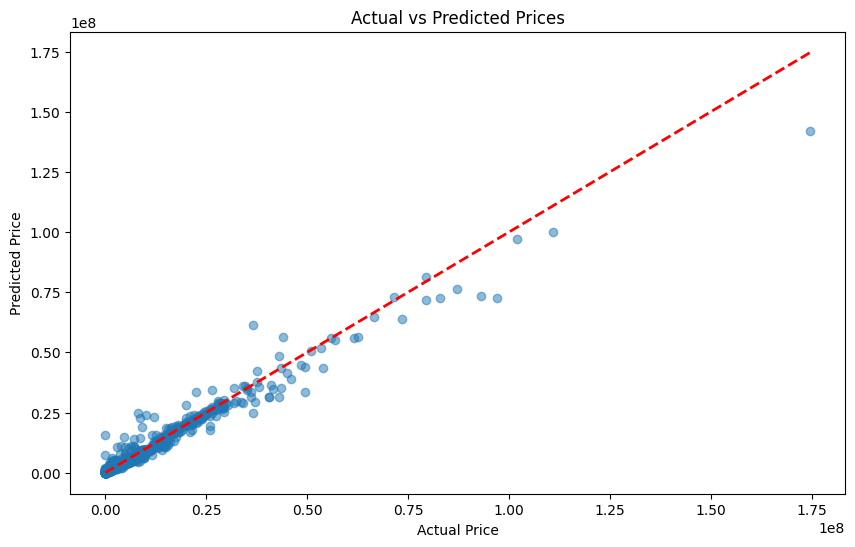

In [406]:
import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()